# Seaborn Intro!

In [11]:
import numpy as np
import calendar

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df.dropna(subset='job_skills')                ## Dropping NaN values
df = df.dropna(subset='salary_year_avg')                ## Dropping NaN values
# df = df.dropna()
# df = df.explode('job_skills')

def clean_list(skill):                       
    return ast.literal_eval(skill)                  ## it runs this and changes String to the List data Type
df['job_skills'] = df['job_skills'].apply(clean_list)



In [4]:
import seaborn as sns

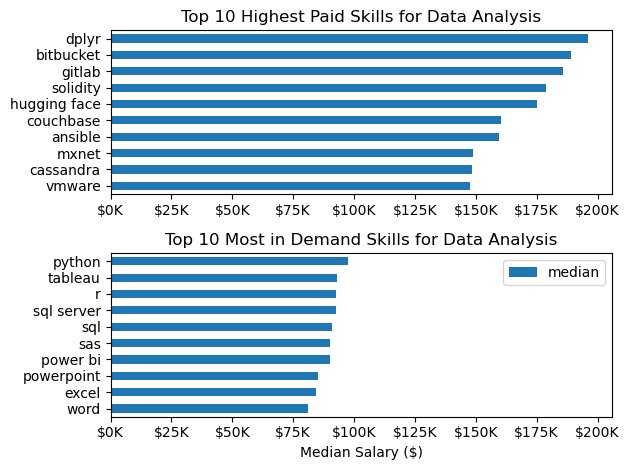

In [5]:
df_us = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()

df_us = df_us.explode('job_skills')

df_us_group = df_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])            ## Totally new learning


## Top Pay
df_top_pay = df_us_group.sort_values(by='median', ascending=False).head(10)
# df_top_pay


## Top Skills

df_top_skill = df_us_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median', ascending=False)
# df_top_skill


fig, ax = plt.subplots(2,1)

df_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')


df_top_skill[::-1].plot(kind='barh',y='median',ax=ax[1])
ax[1].set_title('Top 10 Most in Demand Skills for Data Analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($)')


ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()


plt.show()


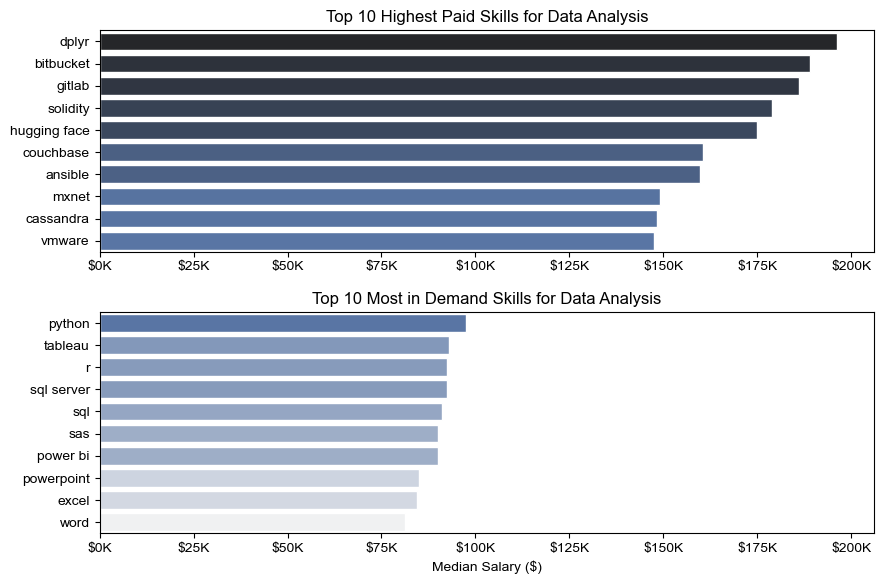

In [6]:
df_us = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()

df_us = df_us.explode('job_skills')

df_us_group = df_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])            ## Totally new learning


## Top Pay
df_top_pay = df_us_group.sort_values(by='median', ascending=False).head(10)
# df_top_pay


## Top Skills

df_top_skill = df_us_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median', ascending=False)
# df_top_skill


fig, ax = plt.subplots(2,1 , figsize=(9,6))


sns.set_theme(style='ticks')
sns.barplot(data=df_top_pay, x = 'median', y=df_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')






# df_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)


ax[0].set_title('Top 10 Highest Paid Skills for Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()


sns.barplot(data=df_top_skill, x = 'median', y=df_top_skill.index, ax=ax[1], hue='median', palette='light:b')
# df_top_skill[::-1].plot(kind='barh',y='median',ax=ax[1])


ax[1].set_title('Top 10 Most in Demand Skills for Data Analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($)')
ax[1].legend().remove()

ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
# plt.figure(figsize=(20,16))
plt.tight_layout()

plt.show()


# Historgram

(0.0, 250000.0)

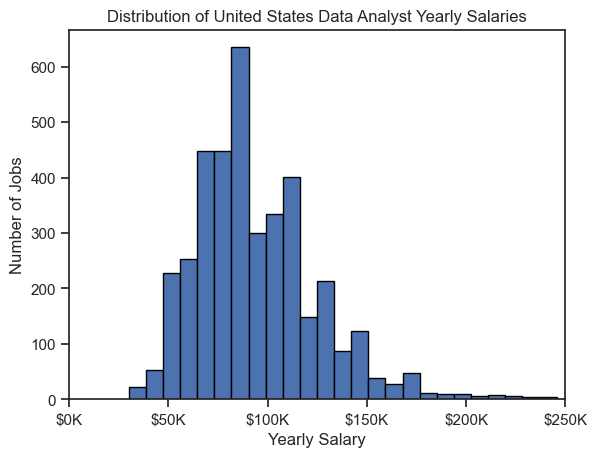

In [7]:
df_usa = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

df_usa['salary_year_avg'].plot(kind='hist', bins = 40,edgecolor = 'black' )
ax = plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel('Yearly Salary') 
plt.ylabel('Number of Jobs') 
plt.xlim(0,250000)


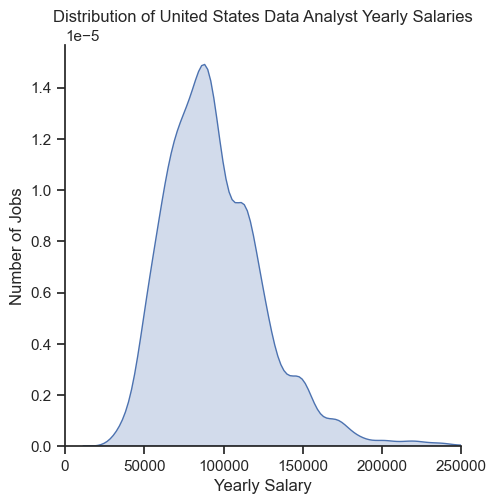

In [8]:
df_usa = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

# df_usa['salary_year_avg'].plot(kind='hist', bins = 40,edgecolor = 'black' )



sns.displot(df_usa['salary_year_avg'], kind ='kde', fill=True)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel('Yearly Salary') 
plt.ylabel('Number of Jobs') 
plt.xlim(0,250000)
ax = plt.gca()


# Box Plot

C:\Users\homeA\AppData\Local\Temp\ipykernel_22396\72170175.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles,vert=False)


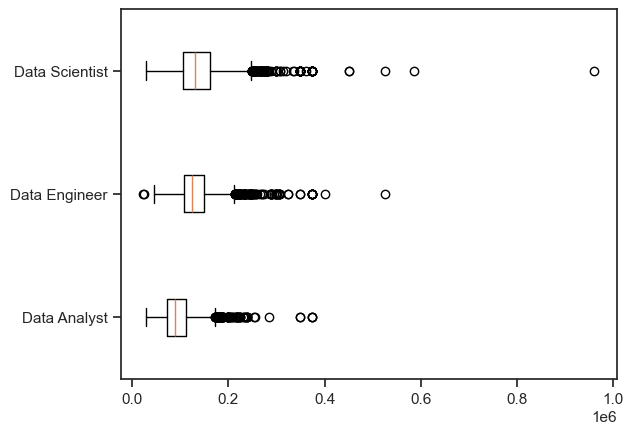

In [9]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_usa = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_usa = df_usa.dropna(subset='salary_year_avg')

df_usa['job_title_short'].value_counts()

job_list = [df_usa[df_usa['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles,vert=False)

# ax = plt.gca()
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
# plt.xlim(0,600000)
plt.show()




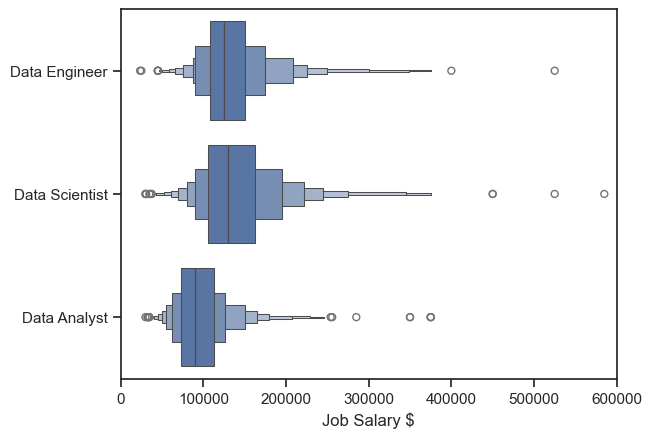

In [10]:
sns.boxenplot(data = df_usa, x = 'salary_year_avg', y='job_title_short')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.ylabel('')
plt.xlabel('Job Salary $')
plt.show()
